In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv') #listo
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv') #listo
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv') #es reemplazado por todos los que corresponden al 2016
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv') #listo
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv') #listo
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv') #se supone que están los dos semestres de 2015 cargados
pev8 = pd.read_csv('properties/properati-AR-2014-07-01-properties-sell.csv') #este va de enero a junio inclusive

In [4]:
#389594 entries
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [5]:
pev['description'].values[0]
#pev['description'].values[1]
#pev['description'].values[2]
#pev['description'].values[3]
#pev['description'].values[4]



'Corredor Responsable: Martin Eguiazu - CCI Mat. N\xc2\xba 0179Contacto: CPN Maria Cecilia Iba\xc3\xb1ez - MLS ID # 420451015-165Excelente propiedad de tres dormitorios, living comedor, cocina, patio, garaje semi abierto y quincho. Cuenta con dos ingresos, uno principal al frente que da al living y el otro por el garaje. Sus detalles constructivos son muy buenos; paredes de ladrillos comunes con aberturas de aluminio, techo de cinc pintado, pisos de cer\xc3\xa1micos, cielorraso de yeso, revestimientos interiores de con revoque fino pintado y muy buena distribuci\xc3\xb3n y funcionalidad. Muy buena distribuci\xc3\xb3n e iluminaci\xc3\xb3n y en un punto estrat\xc3\xa9gico de la ciudad y con entorno socioecon\xc3\xb3mico muy bueno. Cuenta con todos los servicios'

## Evalúo la relación entre el precio promedio de viviendas por barrio (de Capital Federal) con y sin cochera

In [6]:
pev.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
pev_viviendas = pev.loc[(~pev.property_type.str.contains('store')),['description','property_type', \
                    'price_usd_per_m2', 'state_name', 'place_name']]
#pev_viviendas.head(10)
pev_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])
pev_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199143 entries, 12 to 389003
Data columns (total 5 columns):
description         129058 non-null object
property_type       199143 non-null object
price_usd_per_m2    199143 non-null float64
state_name          69837 non-null object
place_name          199143 non-null object
dtypes: float64(1), object(4)
memory usage: 9.1+ MB


In [7]:
pev_viviendas_cochera = pev_viviendas.loc[pev_viviendas.description.str.contains('garaje|garage|garagge|\
            cochera|estacionamiento', case=False) & (pev_viviendas.state_name.str.contains('Capital Federal')),\
            ['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_cochera.iloc[:10,0]
pev_viviendas_cochera.head(10)

,price_usd_per_m2,place_name
0,2277.777778,Monserrat
1,2678.571429,Monserrat
2,2642.857143,Monserrat
3,770.666667,Boedo
4,535.226652,Capital Federal
5,524.553571,Capital Federal
6,2042.483660,Palermo Soho
7,2897.810811,Belgrano
8,573.033708,Capital Federal
9,1449.704142,Belgrano


In [8]:
pev_viviendas_sin_cochera = pev_viviendas.loc[(pev_viviendas.description.str.contains('garaje|cochera|garage|\
    garagge|estacionamiento')==False) & (pev_viviendas.state_name.str.contains('Capital Federal')),\
    ['description', 'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_sin_cochera.iloc[1,0]
pev_viviendas_sin_cochera.head(10)

,description,price_usd_per_m2,place_name
0,Venta de Departamento en edificio 3 AMBIENTES ...,2031.250000,Flores
1,VENTA DEPARTAMENTO 3 AMBIENTES EN PUERTO MADER...,7000.000000,Puerto Madero
2,DEPARTAMENTO CON EXCELENTES DETALLES DE TERMI...,2981.132075,Belgrano
3,Venta de Departamento MONOAMBIENTE en Caballit...,1295.081967,Caballito
4,Venta de Departamento MONOAMBIENTE en Caballit...,2075.757576,Caballito
5,APTO CRÉDITO!!!!Venta de Departamento 2 AMBIEN...,2037.735849,Villa Luro
6,"VENTA IMPERDIBLE 5 AMBIENTES MAS DEPENDENCIA,...",2575.268817,Palermo
7,"VENTA IMPERDIBLE 4 AMBIENTES MAS DEPENDENCIA, ...",2575.268817,Palermo
8,A Estrenar - Excelente Edificio Ideal Estudio ...,1692.307692,Palermo
9,VENTA DEPARTAMENTO DE 3 AMBIENTES APTO PROFESI...,1795.454545,Congreso


In [9]:
print(len(pev_viviendas_cochera))
print(len(pev_viviendas_sin_cochera))

810
15474


In [10]:
pev_viviendas_cochera_promedio_por_barrio = pev_viviendas_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_cochera_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
pev_viviendas_cochera_promedio_por_barrio = pev_viviendas_cochera_promedio_por_barrio\
    .loc[pev_viviendas_cochera_promedio_por_barrio.tamanio_con >5 ,:]
pev_viviendas_cochera_promedio_por_barrio

,promedio_con,tamanio_con
place_name,,
Almagro,1563.376916,11.0
Barracas,1357.948450,8.0
Barrio Norte,3666.856396,7.0
Belgrano,2949.041428,69.0
Boedo,1019.548106,7.0
Caballito,1922.972665,30.0
Capital Federal,797.309659,139.0
Chacarita,1563.443473,19.0
Colegiales,2000.793233,15.0


In [11]:
pev_viviendas_sin_cochera_promedio_por_barrio = pev_viviendas_sin_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_sin_cochera_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
pev_viviendas_sin_cochera_promedio_por_barrio = pev_viviendas_sin_cochera_promedio_por_barrio\
    .loc[pev_viviendas_sin_cochera_promedio_por_barrio.tamanio_sin >5 ,:]

pev_viviendas_sin_cochera_promedio_por_barrio.head(10)

,promedio_sin,tamanio_sin
place_name,,
Abasto,2386.362488,60.0
Agronomía,2130.867175,42.0
Almagro,2090.800436,747.0
Balvanera,1763.776126,474.0
Barracas,1745.080611,267.0
Barrio Norte,2668.542910,843.0
Belgrano,2905.620770,1181.0
Boca,1439.700147,136.0
Boedo,1151.016087,855.0


In [12]:
pev_join = pev_viviendas_cochera_promedio_por_barrio.join(pev_viviendas_sin_cochera_promedio_por_barrio,\
            on=None, how='inner')
#df.drop(['Cochice', 'Pima'])
pev_join = pev_join.drop(['Capital Federal'])
pev_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Almagro to Villa del Parque
Data columns (total 4 columns):
promedio_con    37 non-null float64
tamanio_con     37 non-null float64
promedio_sin    37 non-null float64
tamanio_sin     37 non-null float64
dtypes: float64(4)
memory usage: 1.4+ KB


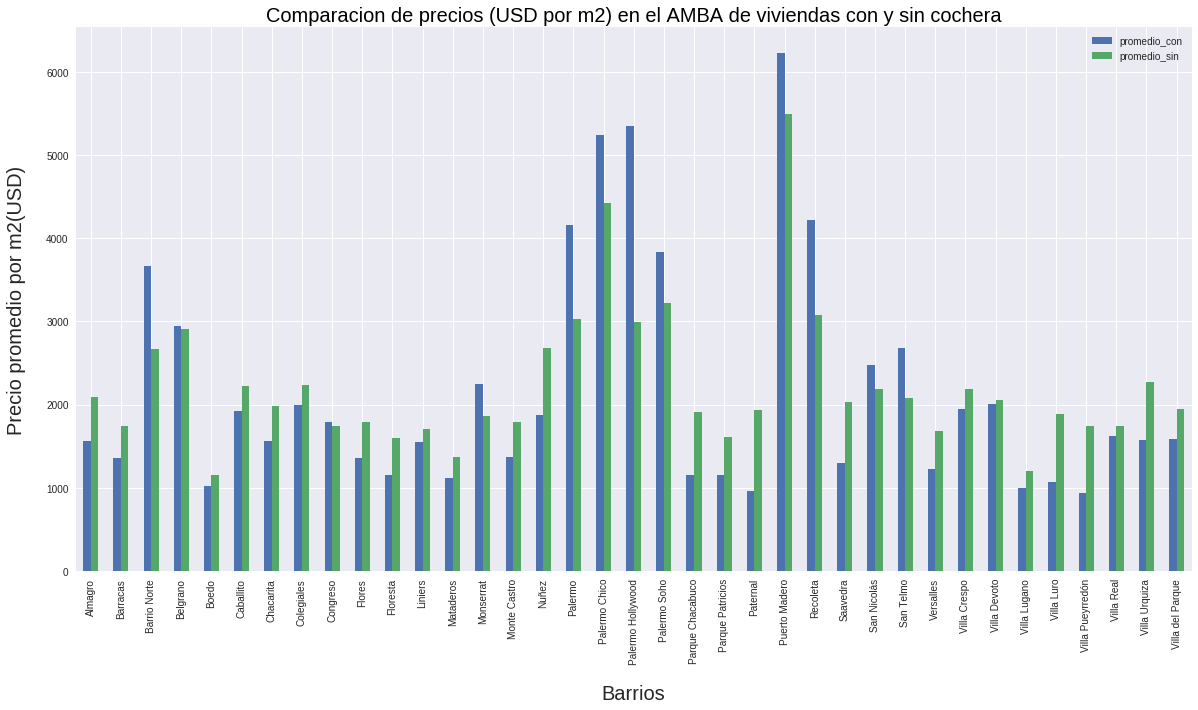

In [13]:
f = plt.figure()
ax = pev_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='bar',figsize=(20,10), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en el AMBA de viviendas con y sin cochera',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=20.0,labelpad=20.0)
plt.show()

## Esto se puede seguir de la siguiente forma: mismo análisis para, por ejemplo, G.B.A (por zona Norte, Sur y Oeste). Se puede hacer el mismo análisis para las viviendas con parrilla y/o pileta

In [14]:
pev_viviendas_cochera_zn = pev_viviendas.loc[pev_viviendas.description.str.contains('garaje|garage|garagge|\
            cochera|estacionamiento', case=False) & (pev_viviendas.state_name.str.contains('Zona Norte')),\
            ['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_cochera.iloc[:10,0]
pev_viviendas_cochera_zn.head(10)

,price_usd_per_m2,place_name
0,1470.588235,Tigre
1,287.500000,Maschwitz
2,1012.145749,Martínez
3,1545.454545,Nordelta
4,1657.894737,La Lucila
5,397.088021,Tigre
6,785.714286,Boulogne Sur Mer
7,1098.765432,Victoria
8,1447.368421,Malvinas Argentinas
9,1600.000000,Acassuso


In [15]:
pev_viviendas_sin_cochera_zn = pev_viviendas.loc[(pev_viviendas.description.str.contains('garaje|cochera|garage|\
    garagge|estacionamiento')==False) & (pev_viviendas.state_name.str.contains('Zona Norte')),\
    ['description', 'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_sin_cochera.iloc[1,0]
pev_viviendas_sin_cochera_zn.head(10)

,description,price_usd_per_m2,place_name
0,Venta de Chacra en Las Vizcachas - - LAGOUAR...,3.600000,Bs.As. G.B.A. Zona Norte
1,Casa villa italiana impecable en Cabos del Lag...,1470.588235,Tigre
2,Precio USD 170.000 mas 61 cuotas de $14.000 ( ...,750.000000,Benavidez
3,San Matias- Area 1- Lote 13Casa en dos plantas...,283.261803,Maschwitz
4,"Departamento Impecable en el Intercontinental,...",3285.714286,Nordelta
5,"2 ambientes en la BahÃ­a, condominios del Hote...",2658.227848,Nordelta
6,Hermosa casa en dos plantas.Excelente construc...,287.500000,Maschwitz
7,Excelente propiedad en Zona residencial. Muy b...,1012.145749,Martínez
8,"Sobre terreno de 1200 m2, casa en esquina comp...",2155.172414,Tortugas Country Club
9,Departamento Precio Venta U$S 92.00033m² Sup...,2787.878788,Vicente López


In [16]:
print(len(pev_viviendas_cochera_zn))
print(len(pev_viviendas_sin_cochera_zn))

2470
13986


In [17]:
pev_viviendas_cochera_promedio_por_barrio_zn = pev_viviendas_cochera_zn.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_cochera_promedio_por_barrio_zn.columns=['promedio_con', 'tamanio_con']
pev_viviendas_cochera_promedio_por_barrio_zn = pev_viviendas_cochera_promedio_por_barrio_zn\
    .loc[pev_viviendas_cochera_promedio_por_barrio_zn.tamanio_con >5 ,:]
pev_viviendas_cochera_promedio_por_barrio_zn.head(10)

,promedio_con,tamanio_con
place_name,,
Acassuso,1431.919276,89.0
Barrio Los Lagos,2099.025298,6.0
Barrio San Francisco,1529.030510,7.0
Barrio Santa Teresa,1454.787591,7.0
Beccar,1249.616206,67.0
Bella Vista,687.991369,10.0
Belén de Escobar,577.415730,11.0
Benavidez,628.011166,110.0
Boulogne Sur Mer,849.289913,39.0


In [18]:
pev_viviendas_sin_cochera_promedio_por_barrio_zn = pev_viviendas_sin_cochera_zn.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_sin_cochera_promedio_por_barrio_zn.columns=['promedio_sin', 'tamanio_sin']
pev_viviendas_sin_cochera_promedio_por_barrio_zn = pev_viviendas_sin_cochera_promedio_por_barrio_zn\
    .loc[pev_viviendas_sin_cochera_promedio_por_barrio_zn.tamanio_sin >5 ,:]

pev_viviendas_sin_cochera_promedio_por_barrio_zn.head(10)

,promedio_sin,tamanio_sin
place_name,,
Country Maschwitz Club,1208.254380,9.0
Acacias Blancas,1074.965548,28.0
Acassuso,1801.798783,187.0
Albanueva Barrio Cerrado,2005.418974,11.0
"Barbarita, Barrio Cerrado",1516.216140,15.0
Barrancas de San Jose,1413.436731,6.0
Barrio Alamo Alto,1104.354862,14.0
Barrio Cerrado Fincas de Maschwitz,744.426174,8.0
Barrio El Golf,2130.197182,28.0


In [19]:
pev_join_zn = pev_viviendas_cochera_promedio_por_barrio_zn.join(pev_viviendas_sin_cochera_promedio_por_barrio_zn,\
            on=None, how='inner')
#pev_join = pev_join.drop(['Capital Federal'])
pev_join_zn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Acassuso to Villa de Mayo
Data columns (total 4 columns):
promedio_con    50 non-null float64
tamanio_con     50 non-null float64
promedio_sin    50 non-null float64
tamanio_sin     50 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [45]:
# me quedo con los 10 barrios con mayor diferencia entre promedios
pev_join_zn['dif_prom'] = abs(pev_join_zn['promedio_con'] - pev_join_zn['promedio_sin'])
pev_join_zn = pev_join_zn.sort_values('dif_prom', ascending=False)
pev_join_zn.head(10)

,promedio_con,tamanio_con,promedio_sin,tamanio_sin,dif_prom
place_name,,,,,
Olivos,1586.733720,161.0,2396.734810,794.0,810.001090
San Isidro,1294.081868,105.0,1868.055156,599.0,573.973288
Victoria,1147.003154,58.0,1670.110326,269.0,523.107172
Vicente López,2042.282242,58.0,2549.111206,399.0,506.828964
La Lucila,1579.331665,54.0,2069.659982,140.0,490.328317
Tigre,1522.988776,236.0,1997.705635,1351.0,474.716859
Florida Oeste,840.938179,11.0,1305.051316,21.0,464.113137
Muñiz,969.937066,13.0,1419.377780,104.0,449.440713
San Miguel,825.439311,49.0,1263.825289,419.0,438.385978


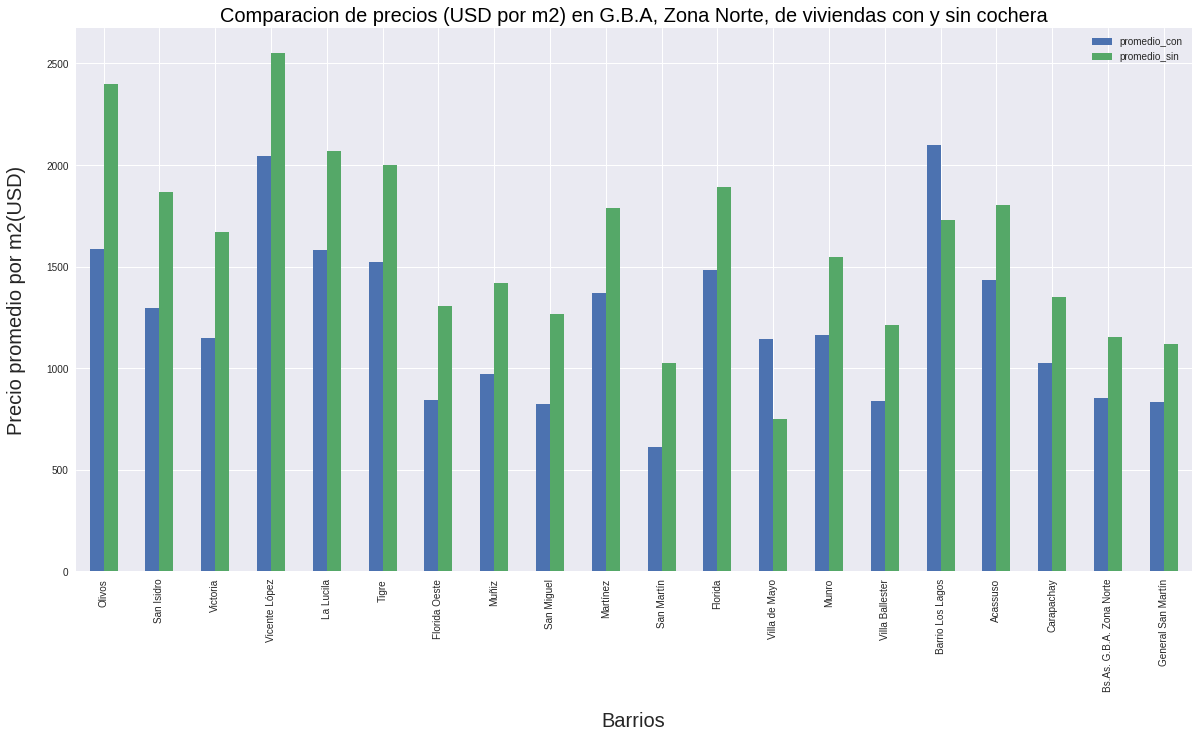

In [48]:
f = plt.figure()
ax = pev_join_zn.head(20).loc[:,['promedio_con', 'promedio_sin']].plot(kind='bar',figsize=(20,10), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en G.B.A, Zona Norte, de viviendas con y sin cochera',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=20.0,labelpad=20.0)
plt.show()